# Series de tiempo

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Bibliotecas de estadisticas
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm 
import scipy.stats as scs

Numero de anuncio es una determinada hora.

In [ ]:
ads = pd.read_csv('https://bit.ly/2l9BdhA', index_col=['Time'], parse_dates=['Time'])
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


Dinero gastado por dia en juegos

In [ ]:
cur = pd.read_csv('https://bit.ly/2lLao3B', index_col=['Time'], parse_dates=['Time'])
cur.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


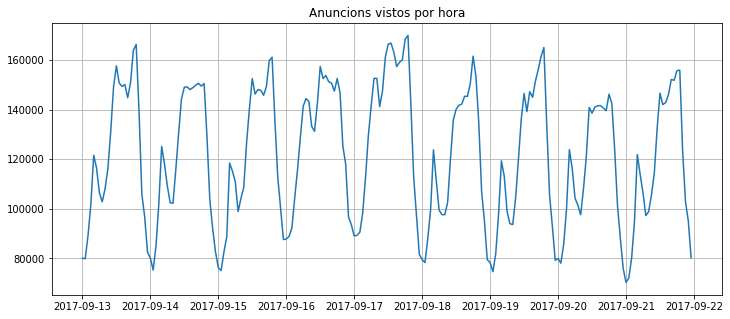

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(ads.Ads)
plt.title('Anuncions vistos por hora')
plt.grid(True)
plt.show()

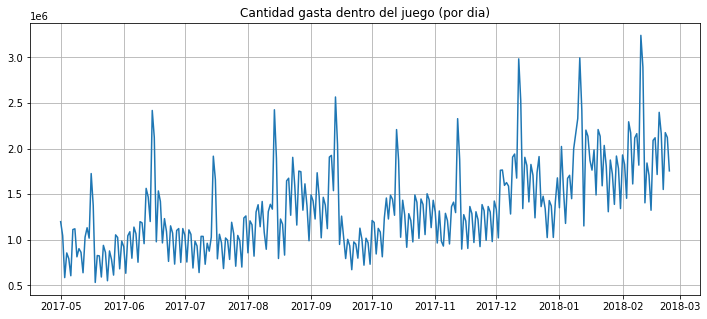

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.title('Cantidad gasta dentro del juego (por dia)')
plt.grid(True)
plt.show()

## Verificar relación


In [ ]:
# autocorrelacion function
data = sm.datasets.sunspots.load_pandas().data
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


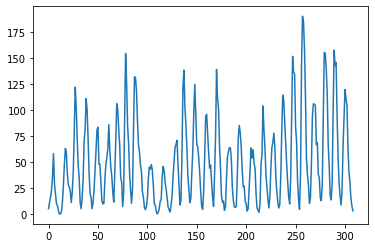

In [ ]:
data.SUNACTIVITY.plot()
plt.show()

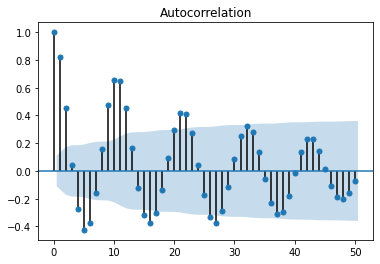

In [ ]:
sm.graphics.tsa.plot_acf(data.SUNACTIVITY.values, lags=50)
plt.show()

Nos indica la correlacion a una diferencia de 1.0 año 

Banda azul que cai en la banda azul nos indica que tienen poca correlación.

Los punto que esten fuera de los datos  nos van a servir para las series de tiempo, su correlación es buena.

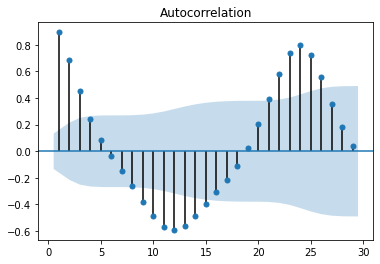

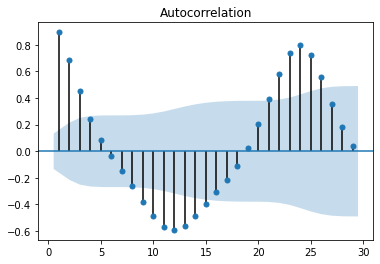

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ads.Ads, lags=range(1,30))

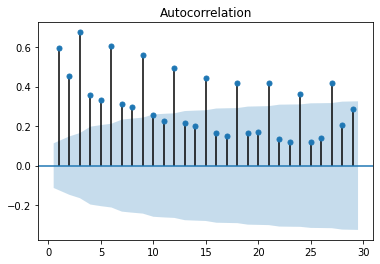

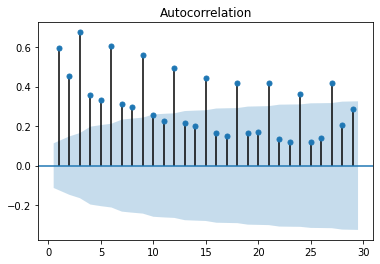

In [ ]:
plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,30))

## Media movil

In [ ]:
# Metricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_predict):
    return np.mean(np.abs(y_true - y_predict  / y_true)) * 100

In [ ]:
# Media movil
def moving_average(series, n):
    """Calcula la media móvil de una serie de tiempo
    Arguments:
    -----
    series -- np.array con los datos de la serie
    n -- el retraso (lag) de la ventana para calcular la media movil
    Returns
    ------:
    Un escalar con la media para la ventana indicada.
    """
    return np.average(series[-n:])

moving_average(ads, 24)

116805.0

In [ ]:
def plot_MA(series, window, plot_intervals=False, scale=1.96,
            plot_anormalies=False):
    """
    plot_intervals - para graficar el error
    plot_anormalies - nos ayuda a hacer zoom, ver la anomlias
    """
    rolling_mean = series.rolling(window=window).mean() # pandas
    plt.figure(figsize=(15,5))
    plt.title('Media móvil\n tamaño de ventana={}'.format(window))
    plt.plot(rolling_mean, 'g', label='Tendencia')
    #*********
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        dev = np.std(series[window:]-rolling_mean[window:])
        upper_ =rolling_mean + (mae + scale*dev)
        lower_ =rolling_mean - (mae + scale*dev)
        plt.plot(upper_, 'r--', label='Límites superior/inferior')
        plt.plot(lower_, 'r--')
    if plot_anormalies:
        anomalies = pd.DataFrame(index=series.index, columns=series.columns)
        anomalies[series < lower_] = series[series < lower_]
        anomalies[series > upper_] = series[series > upper_]
        plt.plot(anomalies, 'ro', markersize=10)

    plt.plot(series[window:], label='Valores reales')
    plt.legend(loc='upper left')
    plt.grid(True)      

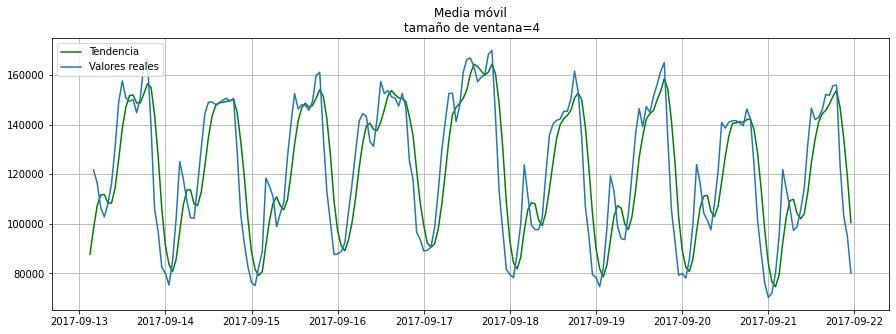

In [ ]:
plot_MA(ads, 4)

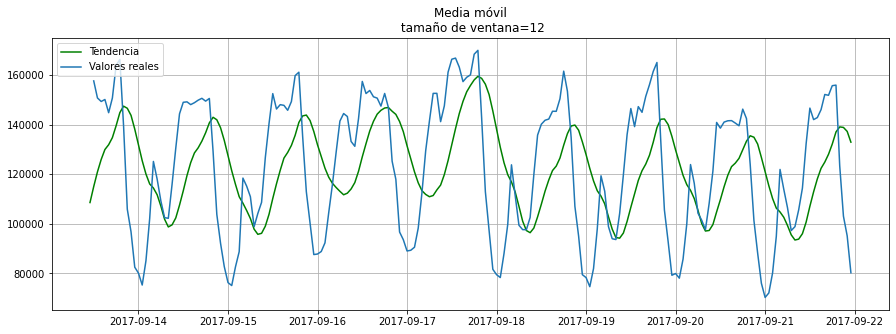

In [ ]:
plot_MA(ads,12)

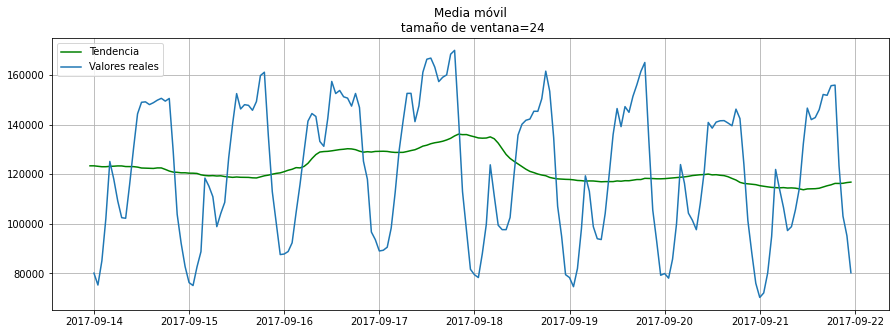

In [ ]:
plot_MA(ads,24)

Vemos la correlación, con 4 se bien, con 12 masomenos, y con 24 es malo, no coincide con los datos reales, estos valores los sacamos gracias a la grafica de correlacion de arriba.



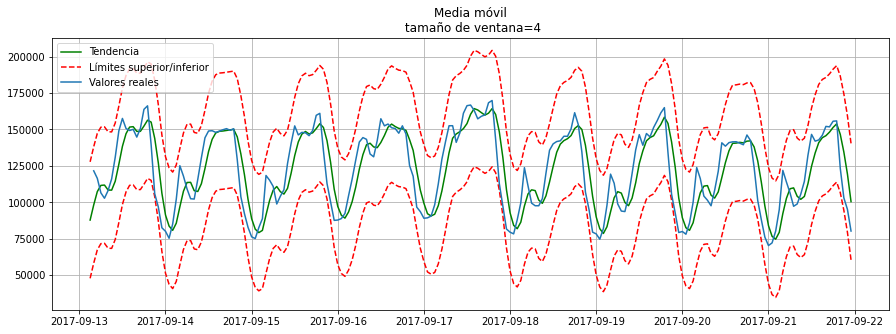

In [ ]:
plot_MA(ads, 4, plot_intervals=True)

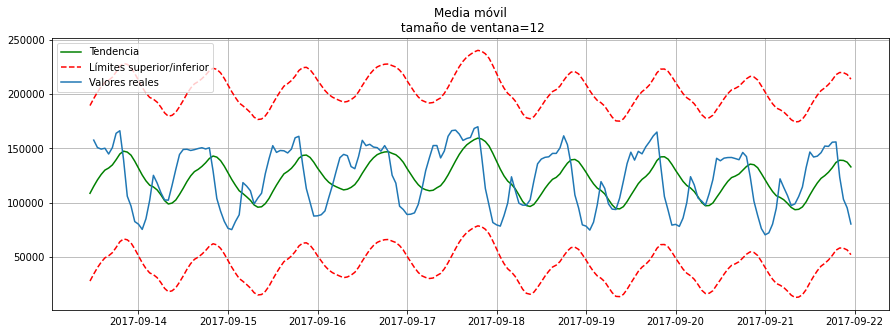

In [ ]:
plot_MA(ads, 12, plot_intervals=True)

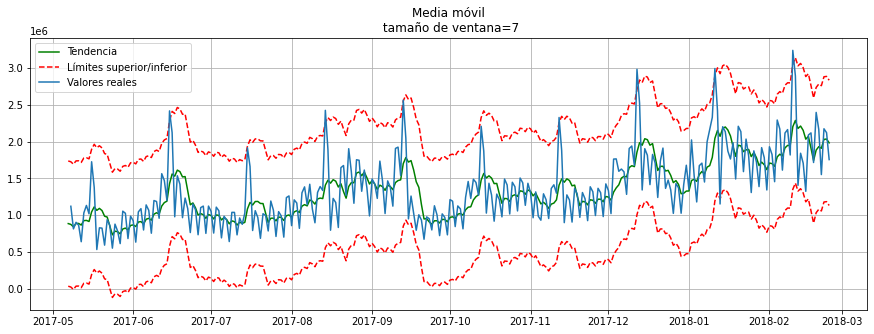

In [ ]:
plot_MA(cur, 7, plot_intervals=True)

Con las lineas rojas, indican los limites 

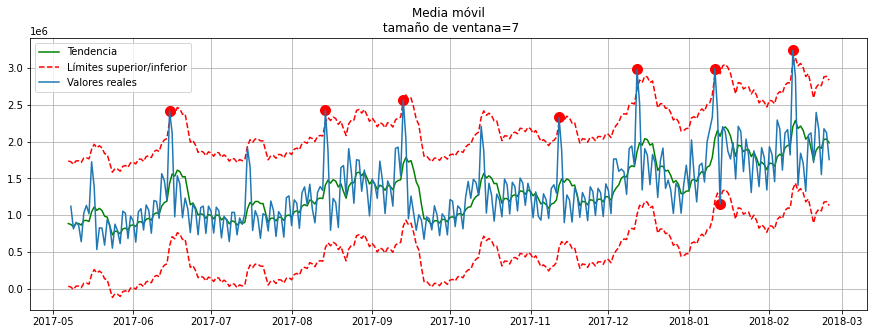

In [ ]:
plot_MA(cur, 7, plot_intervals=True, plot_anormalies=True)

Podemos ver si la grafica toda las lineas rojas signifca que tiene un error o llamados valores anomalos


In [ ]:
# Media movil con pesos
def weighted_MA(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [ ]:
print(ads.tail(3))
weighted_MA(ads, [0.6, 0.3, 0.1])

                        Ads
Time                       
2017-09-21 21:00:00  103080
2017-09-21 22:00:00   95155
2017-09-21 23:00:00   80285


98423.0

## Suavizado exponencial

Para algunas series de datos

In [ ]:
# Suavidado exponencial
# Se encuentra en 
# statsmodels.tsa.api.SimpleExpSmoothing

def exp_smooth(series, alpha):
    res = [series[0]]
    for n in range(1, len(series)):
        res.append(alpha * series[n] + (1-alpha) * res[n-1])
    return res

In [ ]:
def plot_exp_smooth(series, alphas):
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exp_smooth(series, alpha),
                     label='Alpha {}'.format(alpha))
        plt.plot(series.values, 'c', label='Real')
        plt.legend(loc='best')
        plt.title('Suavizado exponencial')
        plt.grid(True)
        plt.show()

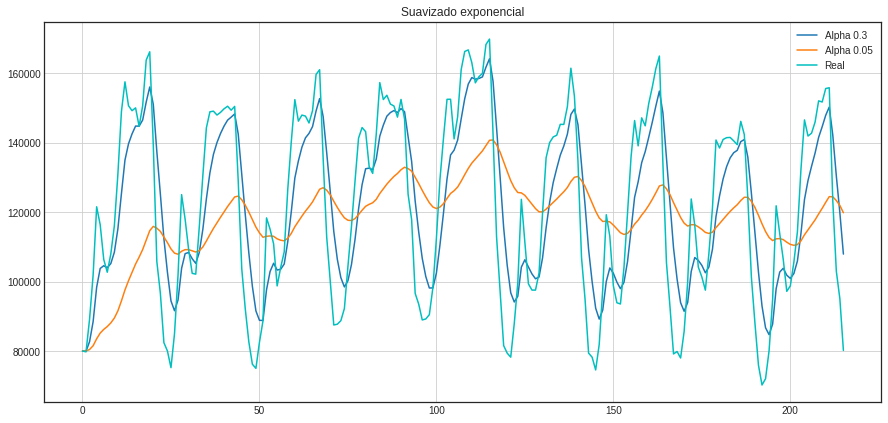

In [ ]:
plot_exp_smooth(ads.Ads, [0.3, 0.05])

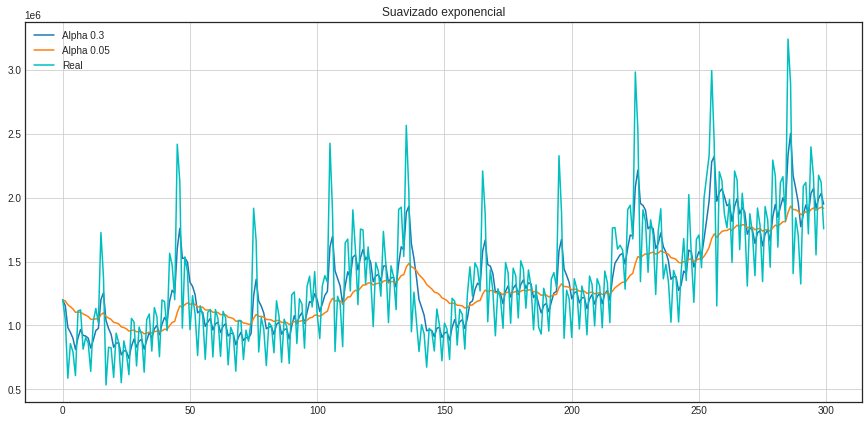

In [ ]:
plot_exp_smooth(cur.GEMS_GEMS_SPENT, [0.3, 0.05] )

# Metodo Holt-winter

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

def plot_HW_1(series):
    ses1 = ExponentialSmoothing((series), seasonal_periods=12,
                                trend='add', seasonal='add').fit()
    # pronóstico
    ses2 = ses1.forecast(len(series)/3)
    series.plot(figsize=(15,7))
    ses2.plot()
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


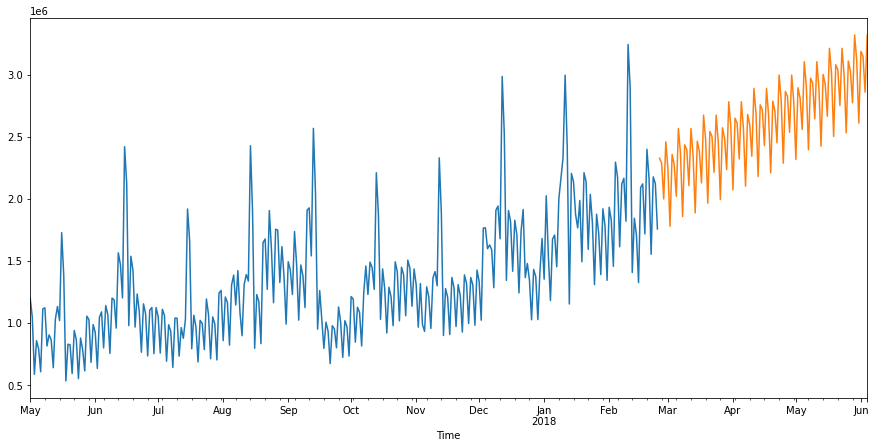

In [ ]:
plot_HW_1(cur.GEMS_GEMS_SPENT)


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_HW_2(series, n=20):
    hw = ExponentialSmoothing((series), seasonal_periods=12).fit()
    # forescat
    train, test = series[:-n], series[len(series)-n:]
    hw_p = hw.predict(start=test.index[0], end=test.index[-1])
    plt.figure(figsize=(15, 7))    
    plt.plot(train.index, train, label='Entrenamiento')
    plt.plot(test.index, test, label='Prueba')
    plt.plot(hw_p.index, hw_p, label='Holt-Winters')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


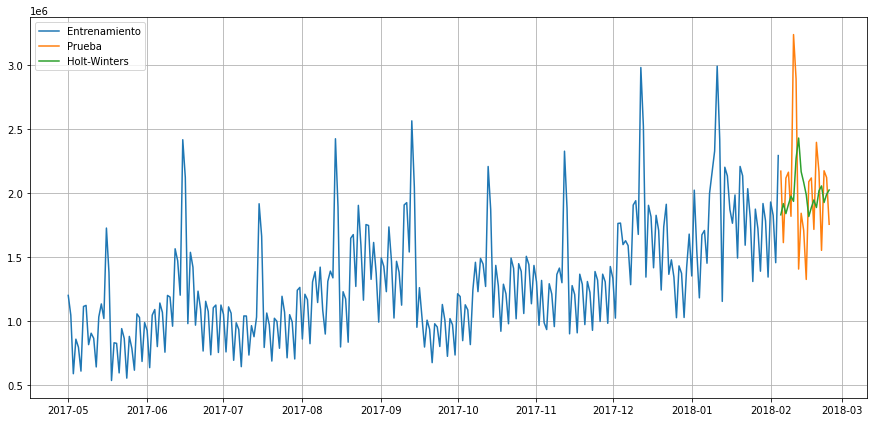

In [ ]:
plot_HW_2(cur.GEMS_GEMS_SPENT)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


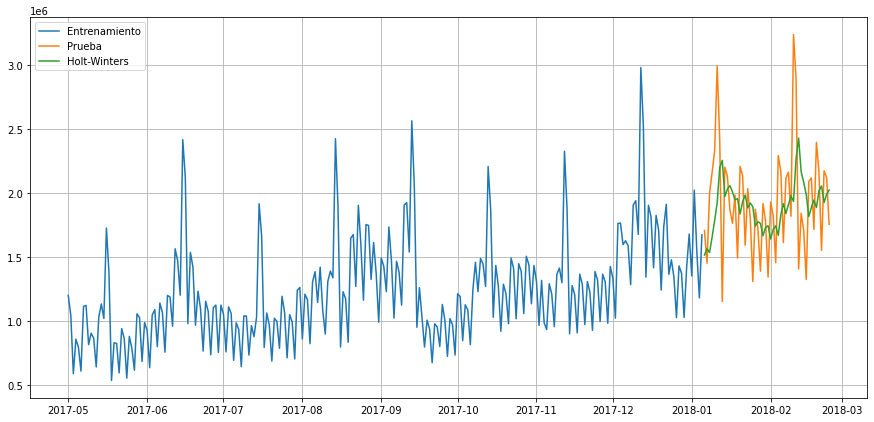

In [ ]:
plot_HW_2(cur.GEMS_GEMS_SPENT, 50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


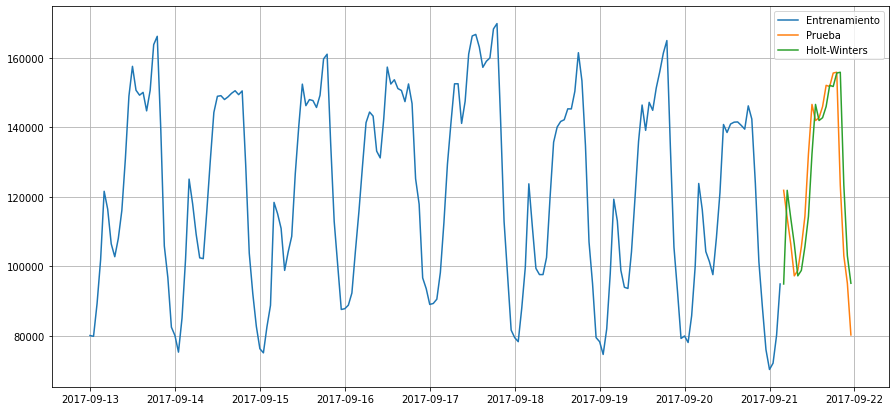

In [ ]:
plot_HW_2(ads.Ads)

### Previsión basada en regresión

In [ ]:
# Analisis de series de tiempo basados en regresión lineal
data = pd.DataFrame(ads.Ads)
data.columns=['y']
data.tail(3)

,y
Time,
2017-09-21 21:00:00,103080
2017-09-21 22:00:00,95155
2017-09-21 23:00:00,80285


In [ ]:
# Agregamos los lags (retrasos) de la variables objetivo de 6 a 24
for i in range(6, 25):
    data['lag_{}'.format(i)] = data.y.shift(i)

data.tail(3)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,,
2017-09-21 21:00:00,103080,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0
2017-09-21 22:00:00,95155,152120.0,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0
2017-09-21 23:00:00,80285,151790.0,152120.0,146020.0,142815.0,141995.0,146630.0,132335.0,114380.0,105635.0,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0


Con estos datos vamos utilizar la regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# validación cruzada con 5 folds {doblete}
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    return X_train, y_train, X_test, y_test

In [ ]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)
X.head(3)

,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,
2017-09-14 00:00:00,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0,80115.0
2017-09-14 01:00:00,166235.0,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0
2017-09-14 02:00:00,139520.0,166235.0,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0


In [ ]:
X_train, y_train, X_test, y_test = timeseries_train_test_split(X, y, 0.3)

In [ ]:
# Modelo de regresion ¡dos lineas!
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
def plot_model_result(model, X_train, y_train, X_test, y_test,
                      plot_intervals=False, scale=1.96):
    pred = model.predict(X_test)
    plt.figure(figsize=(15, 7))
    plt.plot(pred, 'g', label='Predicción', linewidth=2.0)
    plt.plot(y_test.values, 'b', label='Reales', linewidth=2.0)    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, cv=tscv,
                             scoring='neg_mean_absolute_error')
        mae = cv.mean() * -1        
        dev = cv.std()
        low = pred - (mae + scale*dev)
        upp = pred + (mae + scale*dev)
        plt.plot(low, 'r--', label='limites superior/inferior', alpha=0.5)
        plt.plot(upp, 'r--', alpha=0.5)
    
    # Agregar anomalias (opcional)
    error = mean_absolute_percentage_error(pred, y_test)
    plt.title('Error absoluto promedio = {0:.2f}%'.format(error))
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

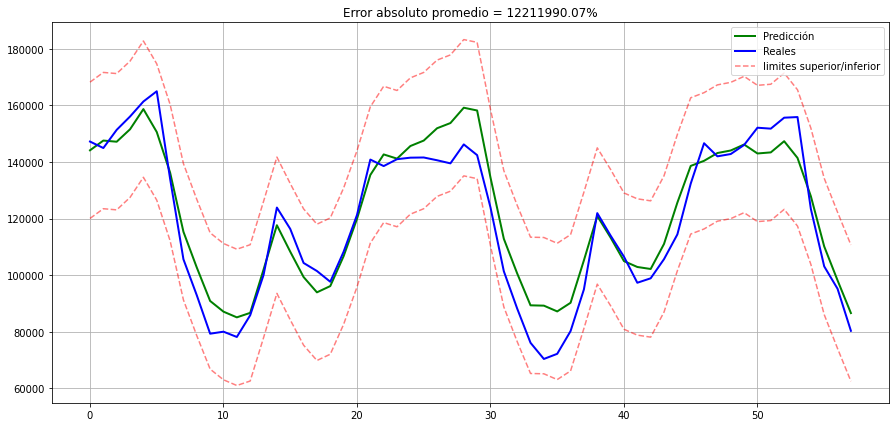

In [ ]:
plot_model_result(lr, X_train, y_train, X_test, y_test, plot_intervals=True)